# Experiments_with_Basic_Example_RNN_Model

Trains models on synthetic data .

In [1]:
import sys
sys.path.append('../..')


In [2]:
from model_compra_comigo.data_handler import DataSimulator
from model_compra_comigo.data_handler import DataHandler
import tensorflow as tf
from numpy import arange
import numpy as np
import tensorflow_datasets as tfds


2023-07-25 13:37:11.382131: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 13:37:11.441176: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 13:37:11.441931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 13:37:12.468656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


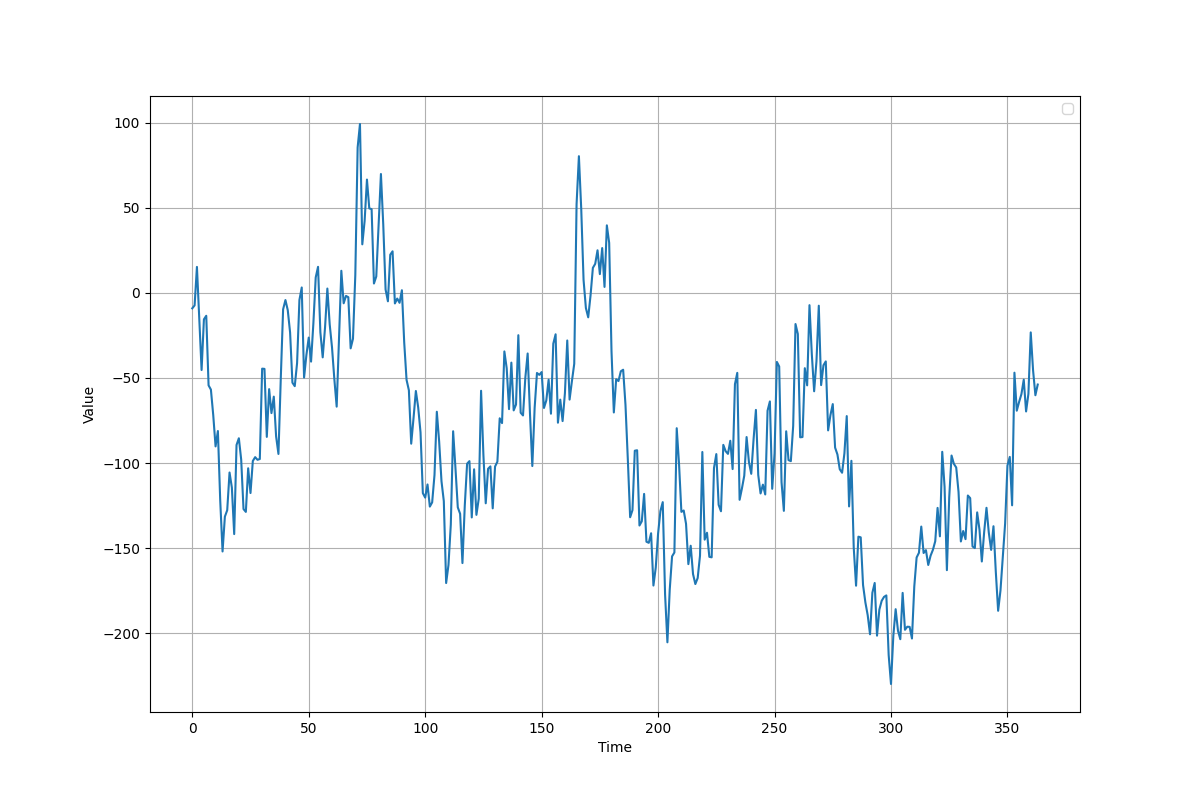

In [4]:
data_simulator = DataSimulator()
time_range = 365
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


## PreviousOne Experiment

In [5]:
window_size = 30
batch_size = 20
epochs = 10
nforecast = 30


In [6]:
from model_compra_comigo.model import PreviousOneExperiment


In [8]:
PreviousOneExperiment.run(
    test_data = (time_data, series),
    window_size = window_size,
    batch_size = batch_size,
    epochs = epochs,
    nforecast = nforecast,
    generate_full_visualization=False
)

2023-07-25 13:40:27.881013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]
2023-07-25 13:40:27.881472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]
2023-07-25 13:40:28.014265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	

## MovingAverage Experiment

In [9]:
window_size = 30
batch_size = 20
epochs = 10
nforecast = 30


In [10]:
from model_compra_comigo.model import MovingAverageExperiment


In [11]:
mae = MovingAverageExperiment()


In [12]:
mae.run(
    test_data = (time_data, series),
    window_size = window_size,
    batch_size = batch_size,
    epochs = epochs,
    nforecast = nforecast,
    generate_full_visualization=False
)


2023-07-25 13:57:06.852353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]
2023-07-25 13:57:06.852835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [365]
	 [[{{node Placeholder/_0}}]]


In [ ]:
import inspect
import collections

print(inspect.signature(mlflow.start_run))